In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [118]:
df = pd.read_csv('./iris.csv')

In [119]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


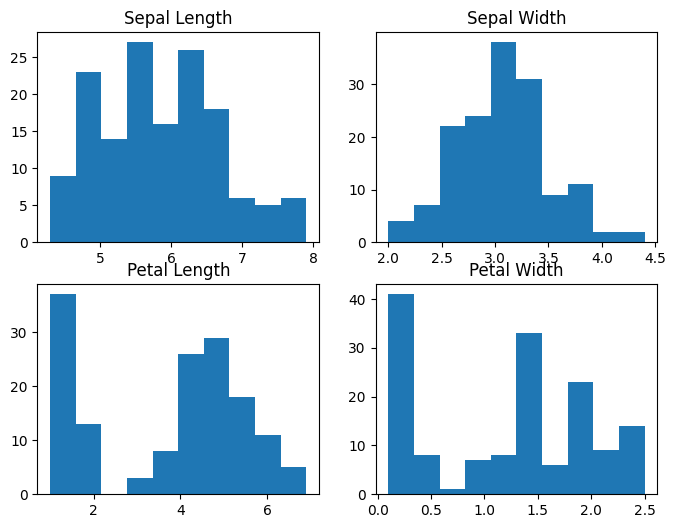

In [142]:
fig, ax = plt.subplots(2,2, figsize = (8,6))

ax[0,0].hist(df['SepalLengthCm']) # Use square brackets to index the array
ax[0,1].hist(df['SepalWidthCm'])
ax[1,0].hist(df['PetalLengthCm'])
ax[1,1].hist(df['PetalWidthCm'])

ax[0,0].set_title('Sepal Length') # Set appropriate titles
ax[0,1].set_title('Sepal Width')
ax[1,0].set_title('Petal Length')
ax[1,1].set_title('Petal Width')

plt.show()


In [143]:
colors = {
    'Iris-setosa': 'red',
    'Iris-versicolor': 'green',
    'Iris-virginica': 'blue'
}

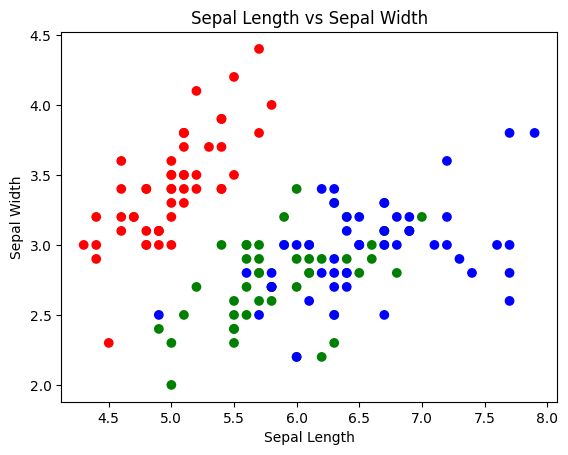

In [144]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c = df['Species'].map(colors))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

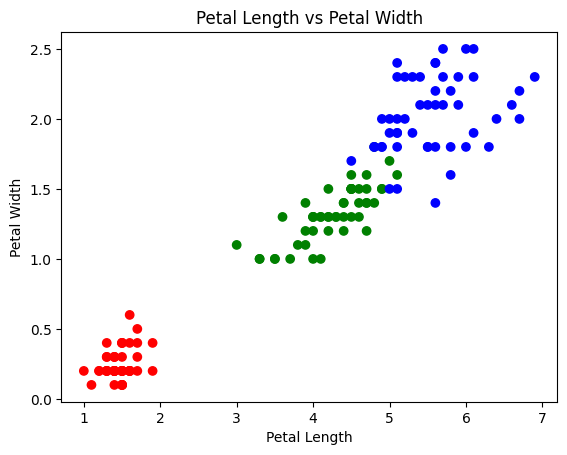

In [145]:
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species'].map(colors))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs Petal Width')
plt.show()

In [148]:
x = df.drop(columns = 'Species')
y = df['Species']


In [149]:
print(x.shape)
print(y.shape)


(150, 4)
(150,)


In [150]:
X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.3, random_state = 5)

print(X_Train.shape)
print(X_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [152]:
print(X_Train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
126            6.2           2.8            4.8           1.8
61             5.9           3.0            4.2           1.5
124            6.7           3.3            5.7           2.1
117            7.7           3.8            6.7           2.2
20             5.4           3.4            1.7           0.2
..             ...           ...            ...           ...
8              4.4           2.9            1.4           0.2
73             6.1           2.8            4.7           1.2
144            6.7           3.3            5.7           2.5
118            7.7           2.6            6.9           2.3
99             5.7           2.8            4.1           1.3

[105 rows x 4 columns]


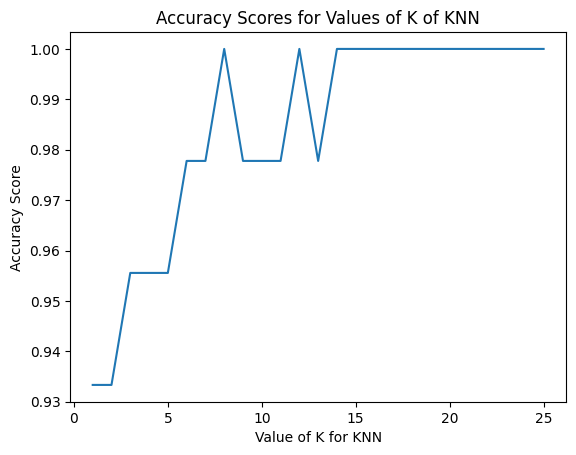

In [155]:
K_range = list(range(1,26))
scores = []
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_Train, y_Train)

    y_pred = knn.predict(X_Test)
    scores.append(metrics.accuracy_score(y_Test, y_pred))

# Make sure these lines are indented at the same level as the 'for' loop
plt.plot(K_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of K of KNN')
plt.show()

In [157]:
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_Train, y_Train)
y_pred = knn.predict(X_Test)
scores.append(metrics.accuracy_score(y_Test, y_pred))

In [158]:
knn.predict([[14, 7, 10, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)